# NYC Uber Time Analysis
#### Saloni Sharma

***
## Import Libraries and Files

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from sklearn.cluster import  KMeans
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import datetime data
# Import 2014 data set
uber2014 = pd.read_csv("uber14-processed.csv", usecols=['Date/Time'], parse_dates=['Date/Time']) #convert column to datetime format

In [3]:
# Import 2015 data set
uber2015 = pd.read_csv("uber15-processed.csv", usecols=['Pickup_date'], parse_dates=['Pickup_date']) #convert to datetime format

***
## Convert Datetime Values
The data sets include datetime values for each Uber ride. Here, they will need to be changed to different types in order to compute and plot k-means clustering of the data.

Below are two functions that will be used to transform the values. The first one converts a datetime value to an integer, which is the total number of minutes since the start of the day. There is a range of 0 to 1439 minutes for one day (Note: 0 will be included as it represents 12:00 AM). The second one converts the total minutes back to a string that shows the hour and minute (H:M). 

In [4]:
# Convert datetime to integer (total minutes)
def time_to_min(datetime_str):
    h = int(datetime_str[:2]) #extract hours
    m = int(datetime_str[3:5])#extract minutes
    total = h*60 + m #compute total minutes since start of day
    return total

In [5]:
# Convert integer back to string for datetime
def min_to_time(total_min):
    hours = total_min//60 #compute the hours 
    minutes = int(total_min - hours*60) #compute minutes
    hours_str = str(int(hours))
    min_str = str(minutes)
    dt_str = hours_str + ":" + min_str #combine
    #if the hour is < 10 or the minutes are < 10
    if len(dt_str) < 5:
        if len(hours_str) == 1:
            hours_str = "0" + hours_str
        if len(min_str) == 1:
            min_str = "0" + min_str
        dt_str = hours_str + ":" + min_str
    return dt_str

### _Uber 2014_

In [6]:
# Convert datetime values to integers of minutes
uber2014['Minutes'] = uber2014['Date/Time'].apply(lambda x: time_to_min(x.strftime("%H:%M")) )

In [7]:
uber2014.head()

,Date/Time,Minutes
0,2014-04-01 00:00:00,0
1,2014-04-01 00:00:00,0
2,2014-04-01 00:00:00,0
3,2014-04-01 00:01:00,1
4,2014-04-01 00:02:00,2


### _Uber 2015_

In [8]:
# Convert datetime values to int minutes
uber2015['Minutes'] = uber2015['Pickup_date'].apply(lambda x: time_to_min(x.strftime("%H:%M")) )

In [9]:
uber2015.head()

,Pickup_date,Minutes
0,2015-04-01 00:01:00,1
1,2015-04-01 00:02:00,2
2,2015-04-01 00:03:00,3
3,2015-04-01 00:03:00,3
4,2015-04-01 00:03:00,3


***
## Dataframes for K-means
We will cluster the data using the minute of the day, and then, plot that along with the count of rides at that time. <br>
First, we will create dataframes that hold the count of Uber rides for each minute of the day as well as the corresponding minute.

### _Uber 2014_

In [10]:
# Create dataframe with counts of rides for each minute of day
df_2014 = pd.DataFrame((uber2014['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 

In [11]:
df_2014 = df_2014.reset_index() # to get column with Minutes corresponding to the counts

In [12]:
# Change names of columns to match their data
df_2014 = df_2014.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})

In [13]:
df_2014.head()

,MinuteOfDay,MinCounts
0,0,862
1,1,872
2,2,875
3,3,804
4,4,854


### _Uber 2015_

In [14]:
# Create dataframe with counts of rides for each minute of day
df_2015 = pd.DataFrame((uber2015['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 

In [15]:
df_2015 = df_2015.reset_index() # to get column with Minutes corresponding to the counts

In [16]:
# Change names of columns to match their data
df_2015 = df_2015.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})

In [17]:
df_2015.head()

,MinuteOfDay,MinCounts
0,0,6570
1,1,6636
2,2,6675
3,3,6593
4,4,6710


***
## K-means Clustering
In this section, we will create clusters using the new dataframes and plot them along with their centroids.

### _Uber 2014_

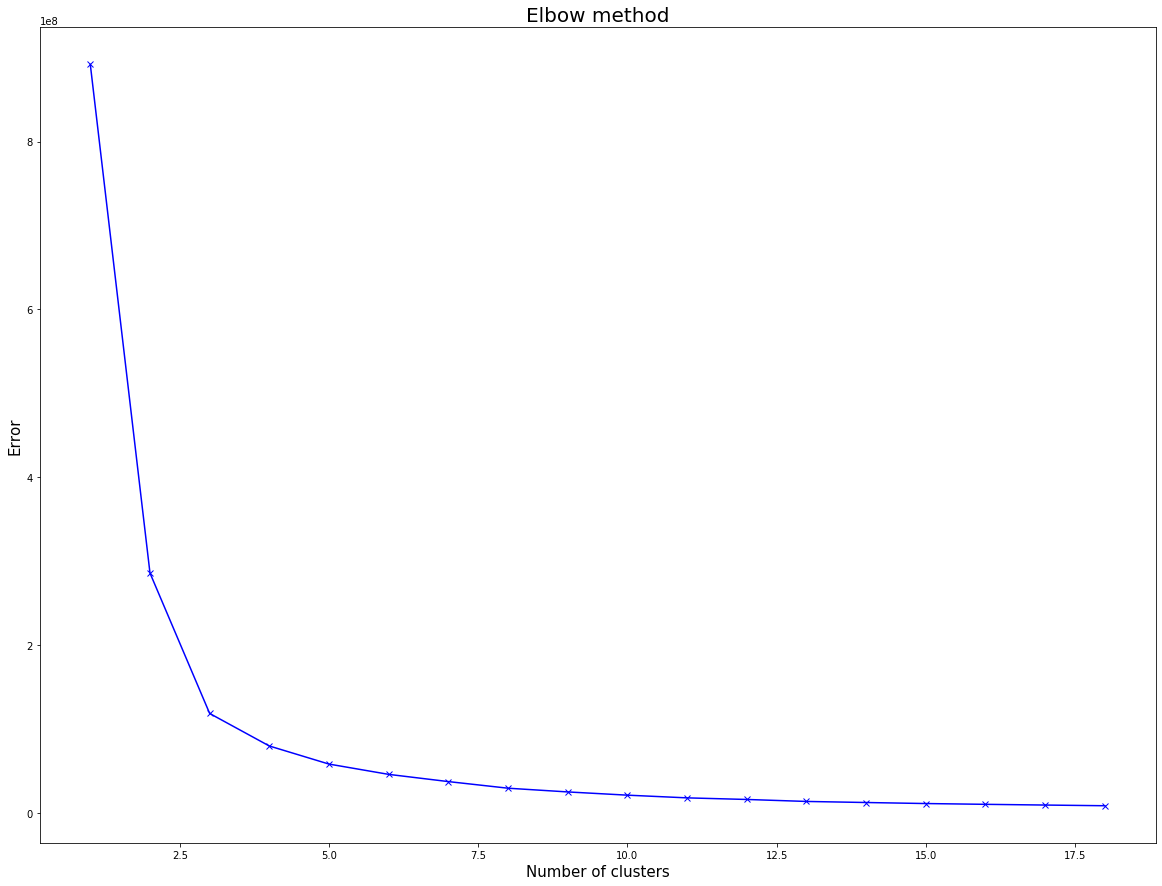

In [18]:
# Find the optimal number of clusters using the Elbow method
# Compute
Error =[]
for i in range(1, 19): 
    kmeans = KMeans(n_clusters = i).fit(df_2014)
    kmeans.fit(df_2014)
    Error.append(kmeans.inertia_)
# Plot
fig = plt.subplots(figsize=(20,15))
plt.plot(range(1, 19), Error, 'bx-')
plt.title('Elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.show()

In [19]:
# From the chart, we can see that 5 is the optimal number, where it starts a linear decline
# Compute the clusters with k = 5
kmeans_2014 = KMeans(n_clusters=5)
c_kmeans_2014 = kmeans_2014.fit_predict(df_2014)
print(c_kmeans_2014)

[0 0 0 ... 4 4 4]


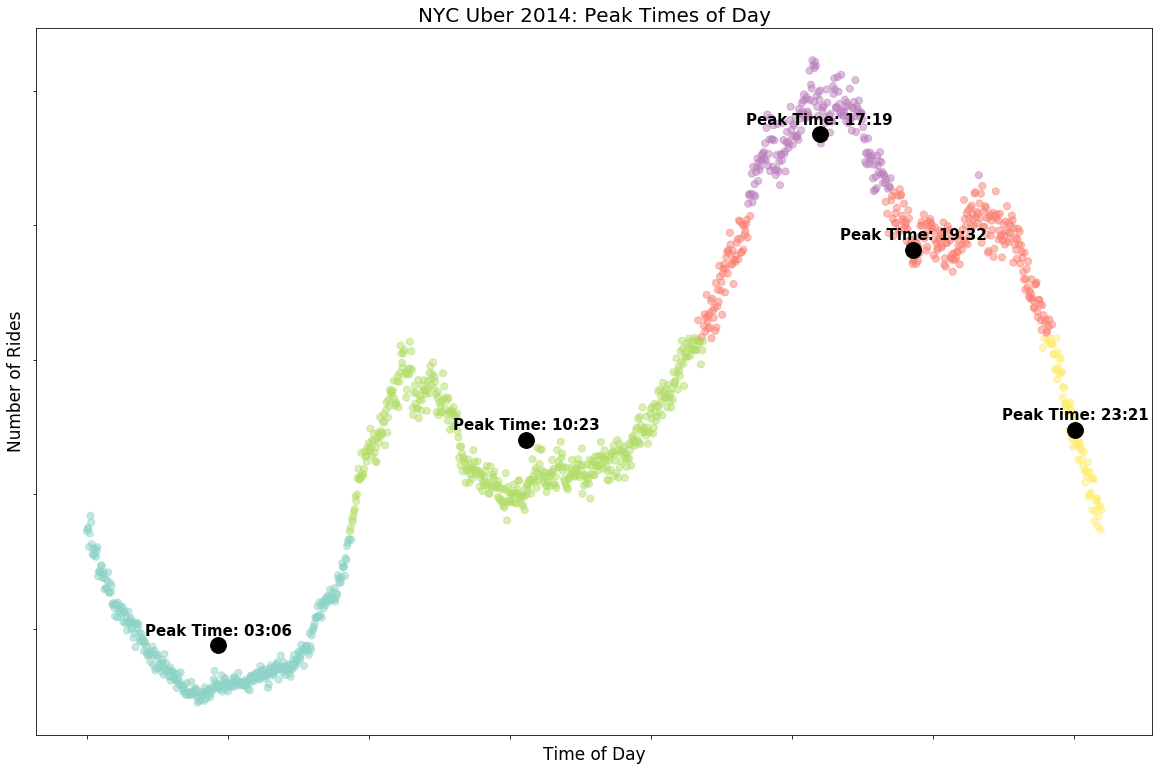

In [20]:
# Plot
ax_2014,fig_2014 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_2014['MinuteOfDay'], df_2014['MinCounts'], c=c_kmeans_2014, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_2014.cluster_centers_[:,0], kmeans_2014.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_2014.set_xticklabels([])
fig_2014.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2014: Peak Times of Day", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_2014.cluster_centers_[:,0], kmeans_2014.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [22]:
# Export image file
ax_2014.savefig("Uber_2014.png", dpi=300)

### _Uber 2015_

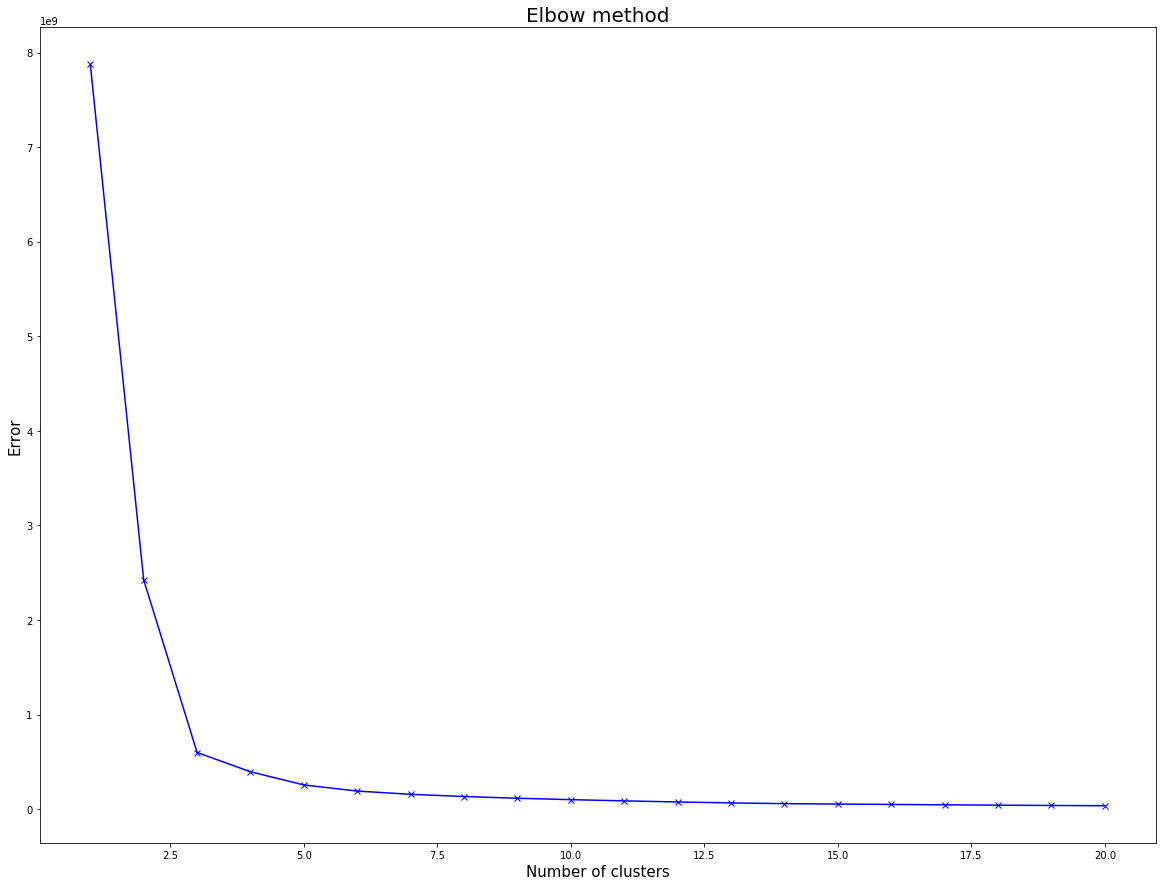

In [23]:
# Find the optimal number of clusters using the Elbow method
# Compute
Error =[]
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i).fit(df_2015)
    kmeans.fit(df_2015)
    Error.append(kmeans.inertia_)
# Plot
fig = plt.subplots(figsize=(20,15))
plt.plot(range(1, 21), Error, 'bx-')
plt.title('Elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.show()

In [24]:
# From the chart, we can see that 5 is the optimal number of clusters
# It is also better for comparison with the 2014 chart
# Compute clusters with k = 5
kmeans_2015 = KMeans(n_clusters=5)
c_kmeans_2015 = kmeans_2015.fit_predict(df_2015)
print(c_kmeans_2015)

[4 4 4 ... 4 4 4]


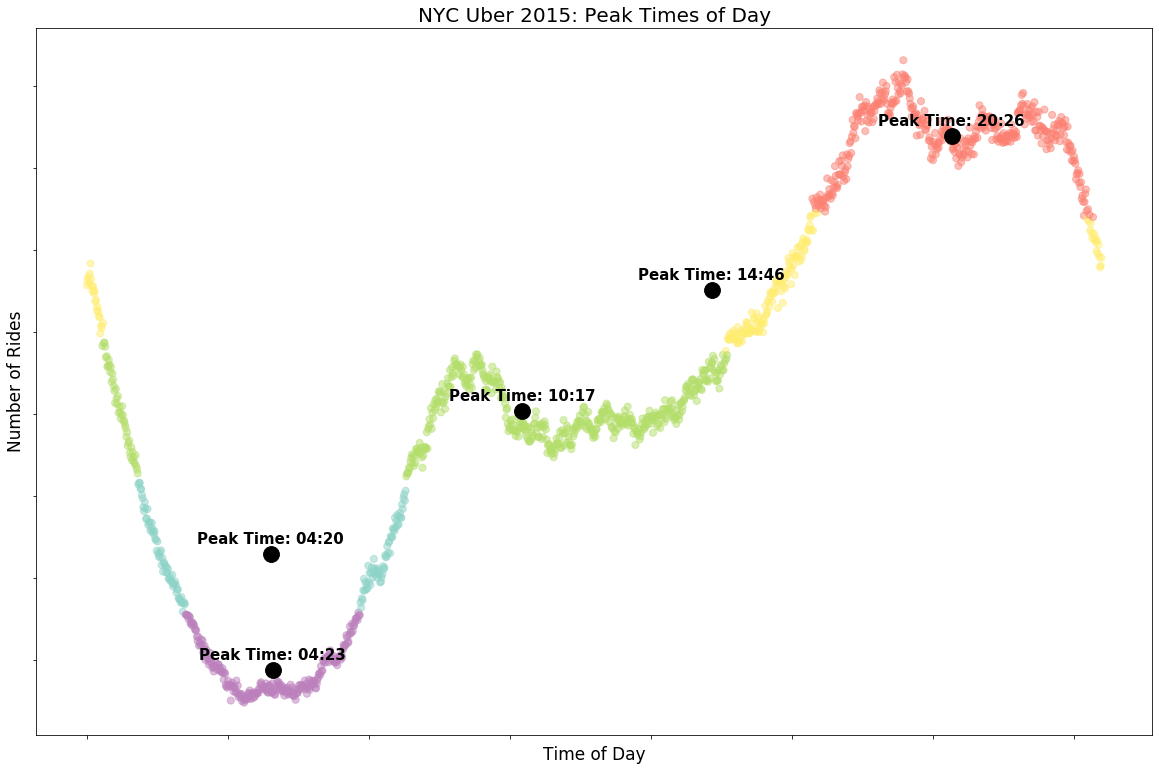

In [25]:
# Plot
ax_2015,fig_2015 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_2015['MinuteOfDay'], df_2015['MinCounts'], c=c_kmeans_2015, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_2015.cluster_centers_[:,0], kmeans_2015.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_2015.set_xticklabels([])
fig_2015.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2015: Peak Times of Day", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_2015.cluster_centers_[:,0], kmeans_2015.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [26]:
# Export image file
ax_2015.savefig("Uber_2015.png", dpi=300)

***
## Dataframes for Monday vs. Saturday
The plots above include all data for April through June. However, from previous exploration we have seen that there are different peak times on differen days of the week. Therefore, we will plot clusters for Monday and Saturday below. 

### _Uber 2014_

In [27]:
# Create column with corresponding day of the week in original data set df
uber2014['Day'] = uber2014['Date/Time'].dt.day_name()

In [28]:
# Create dataframe of datetime values from Monday
Mon_2014 = uber2014.loc[uber2014['Day']=='Monday'].copy()

In [29]:
# Similar to above, create dataframe with counts of rides for each minute of day
df_Mon_2014 = pd.DataFrame((Mon_2014['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 

In [30]:
df_Mon_2014 = df_Mon_2014.reset_index() #get column with Minutes corresponding to the counts
# Change names of columns to match data
df_Mon_2014 = df_Mon_2014.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})
df_Mon_2014.head()

,MinuteOfDay,MinCounts
0,0,48
1,1,47
2,2,44
3,3,43
4,4,40


In [31]:
# Same process for Saturday

# Create dataframe
Sat_2014 = uber2014.loc[uber2014['Day']=='Saturday'].copy()
df_Sat_2014 = pd.DataFrame((Sat_2014['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 

In [32]:
df_Sat_2014 = df_Sat_2014.reset_index() #get column with Minutes corresponding to the counts
# Change columns names to match data
df_Sat_2014 = df_Sat_2014.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})
df_Sat_2014.head()

,MinuteOfDay,MinCounts
0,0,236
1,1,242
2,2,226
3,3,219
4,4,233


### _Uber 2015_

In [33]:
# Same process for 2015 data
# Create column with corresponding day of the week in original data set df
uber2015['Day'] = uber2015['Pickup_date'].dt.day_name()

In [34]:
# Create dataframe
Mon_2015 = uber2015.loc[uber2015['Day']=='Monday'].copy()
df_Mon_2015 = pd.DataFrame((Mon_2015['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 

In [35]:
df_Mon_2015 = df_Mon_2015.reset_index() #get column with Minutes corresponding to the counts
# Change columns names to match data
df_Mon_2015 = df_Mon_2015.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})
df_Mon_2015.head()

,MinuteOfDay,MinCounts
0,0,564
1,1,555
2,2,549
3,3,562
4,4,612


In [36]:
# Saturdays for 2015
# Create dataframe
Sat_2015 = uber2015.loc[uber2015['Day']=='Saturday'].copy()
df_Sat_2015 = pd.DataFrame((Sat_2015['Minutes'].value_counts().reindex(range(0,1440), fill_value=0)).sort_index()) 
# Get column with Minutes corresponding to the counts
df_Sat_2015 = df_Sat_2015.reset_index() 
# Change columns names to match data
df_Sat_2015 = df_Sat_2015.rename(columns={'index': 'MinuteOfDay', 'Minutes': 'MinCounts'})
df_Sat_2015.head()

,MinuteOfDay,MinCounts
0,0,1435
1,1,1454
2,2,1459
3,3,1476
4,4,1485


***
##  K-means Clusters for Monday vs. Saturday
### _Uber 2014_

In [37]:
# We will use k=5 clusters to match the previous charts and compare these ones
# Mondays - 2014
kmeans_Mon14 = KMeans(n_clusters=5)
c_kmeans_Mon14 = kmeans_Mon14.fit_predict(df_Mon_2014)
print(c_kmeans_Mon14)

[0 0 0 ... 2 2 2]


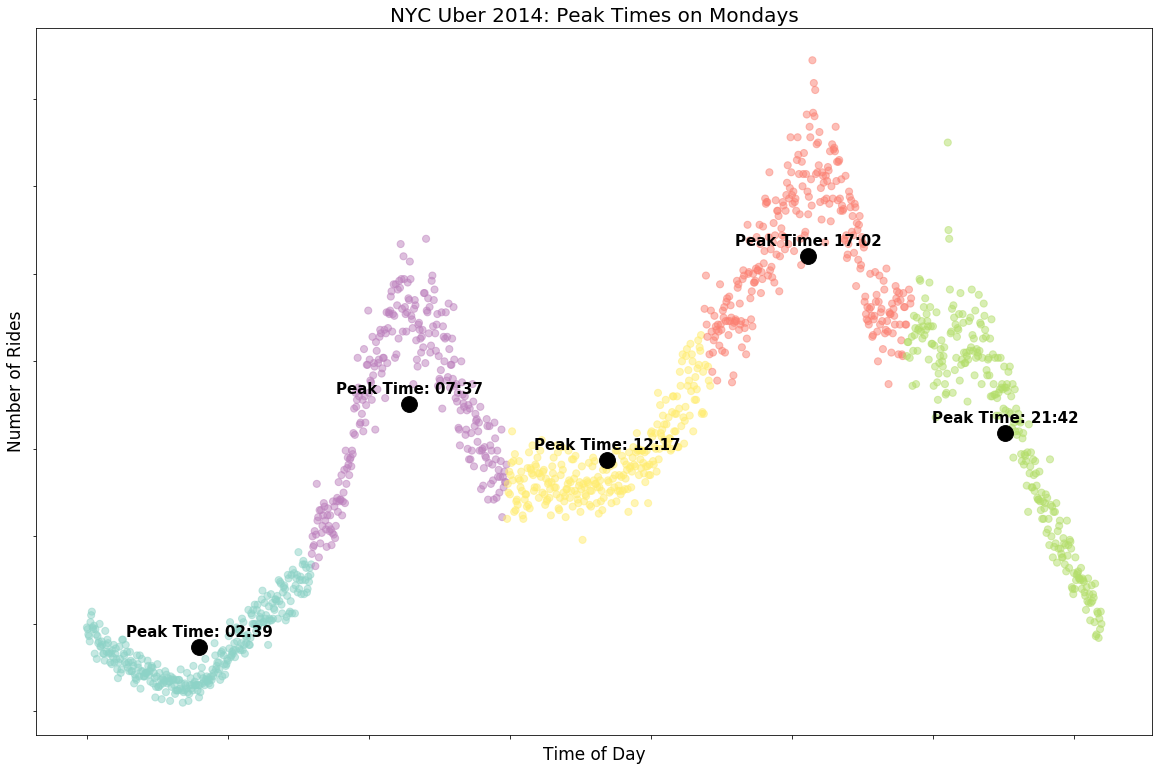

In [38]:
# Plot - Mondays 2014
ax_Mon14,fig_Mon14 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_Mon_2014['MinuteOfDay'], df_Mon_2014['MinCounts'], c=c_kmeans_Mon14, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_Mon14.cluster_centers_[:,0], kmeans_Mon14.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_Mon14.set_xticklabels([])
fig_Mon14.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2014: Peak Times on Mondays", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_Mon14.cluster_centers_[:,0], kmeans_Mon14.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [39]:
# Export image file
ax_Mon14.savefig("Uber_Mon2014.png", dpi=300)

In [40]:
# We will use k=5 clusters to match the previous charts and compare these ones
# Saturdays 2014

kmeans_Sat14 = KMeans(n_clusters=5)
c_kmeans_Sat14 = kmeans_Sat14.fit_predict(df_Sat_2014)
print(c_kmeans_Sat14)

[3 3 3 ... 4 4 4]


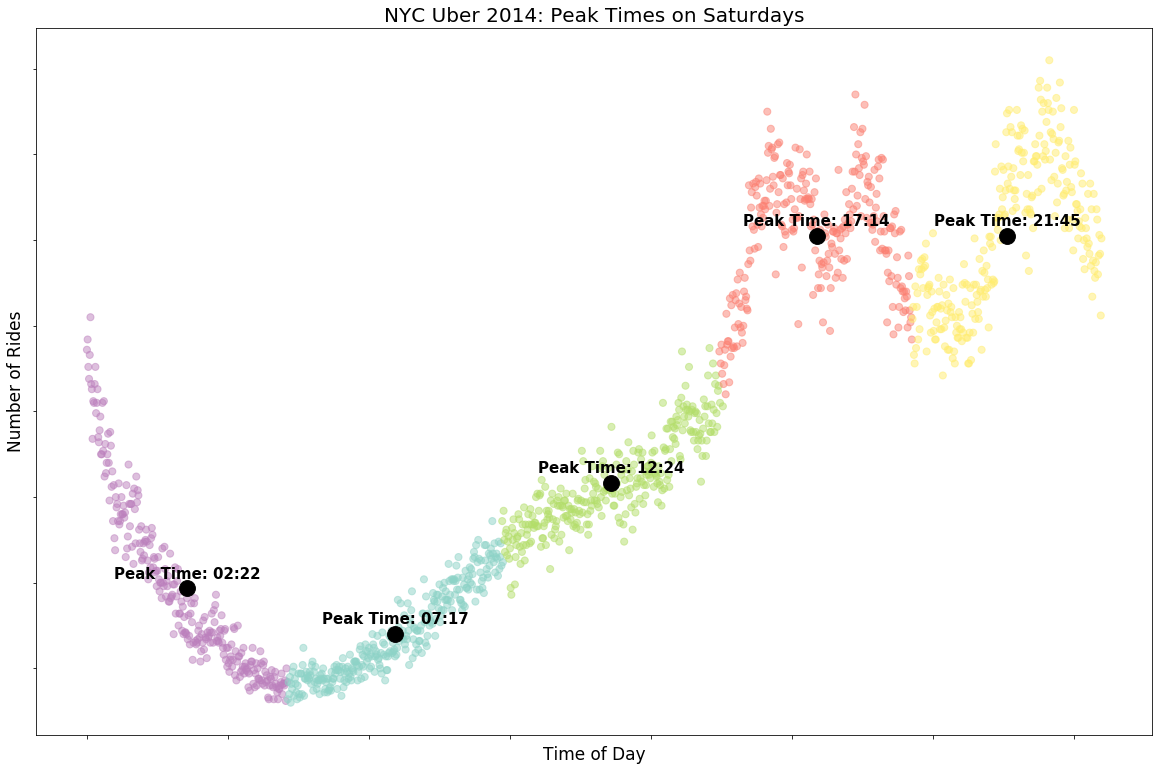

In [41]:
# Plot - Saturdays 2014
ax_Sat14,fig_Sat14 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_Sat_2014['MinuteOfDay'], df_Sat_2014['MinCounts'], c=c_kmeans_Sat14, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_Sat14.cluster_centers_[:,0], kmeans_Sat14.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_Sat14.set_xticklabels([])
fig_Sat14.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2014: Peak Times on Saturdays", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_Sat14.cluster_centers_[:,0], kmeans_Sat14.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [42]:
# Export image file
ax_Sat14.savefig("Uber_Sat2014.png", dpi=300)

### _Uber 2015_

In [43]:
# We will use k=5 clusters to match the previous charts and compare these ones
# Mondays 2015
kmeans_Mon15 = KMeans(n_clusters=5)
c_kmeans_Mon15 = kmeans_Mon15.fit_predict(df_Mon_2015)
print(c_kmeans_Mon15)

[1 1 1 ... 4 4 4]


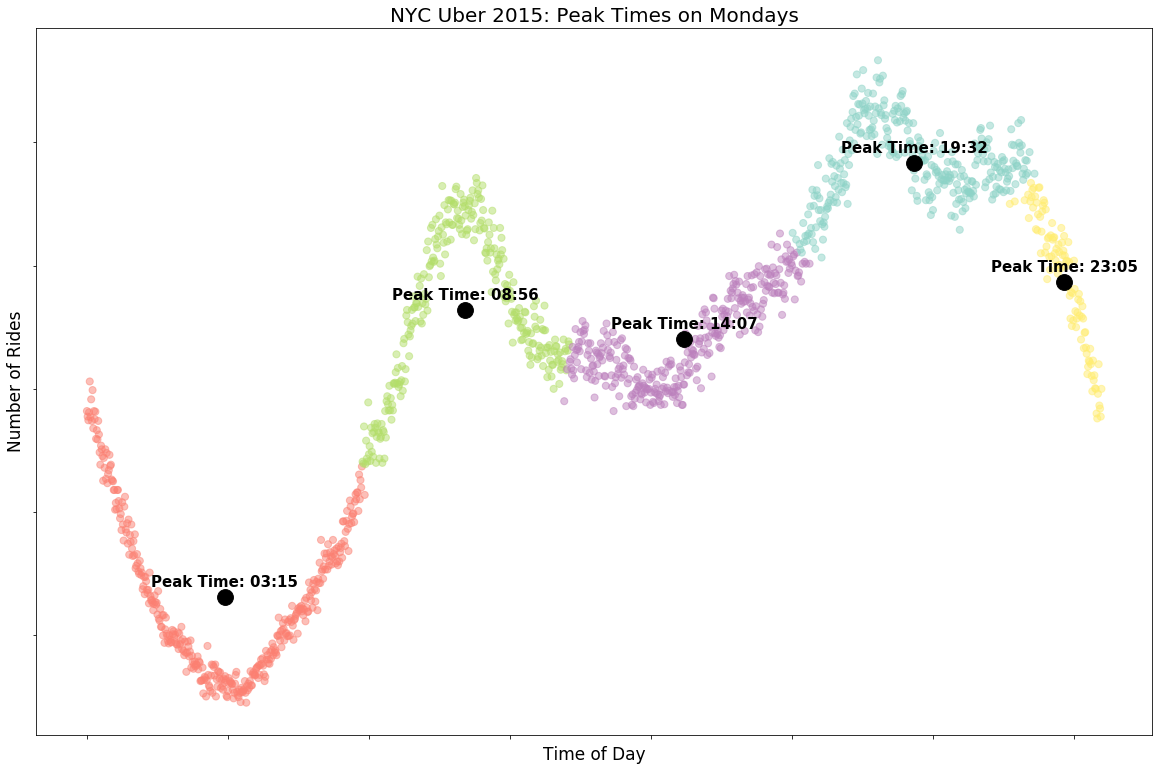

In [44]:
# Plot - Mondays 2015
ax_Mon15,fig_Mon15 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_Mon_2015['MinuteOfDay'], df_Mon_2015['MinCounts'], c=c_kmeans_Mon15, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_Mon15.cluster_centers_[:,0], kmeans_Mon15.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_Mon15.set_xticklabels([])
fig_Mon15.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2015: Peak Times on Mondays", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_Mon15.cluster_centers_[:,0], kmeans_Mon15.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [45]:
# Export plot as image file
ax_Mon15.savefig("Uber_Mon2015.png", dpi=300)

In [46]:
# We will use k=5 clusters to match the previous charts
# Saturdays 2015

kmeans_Sat15 = KMeans(n_clusters=5)
c_kmeans_Sat15 = kmeans_Sat15.fit_predict(df_Sat_2015)
print(c_kmeans_Sat15)

[3 3 3 ... 1 1 1]


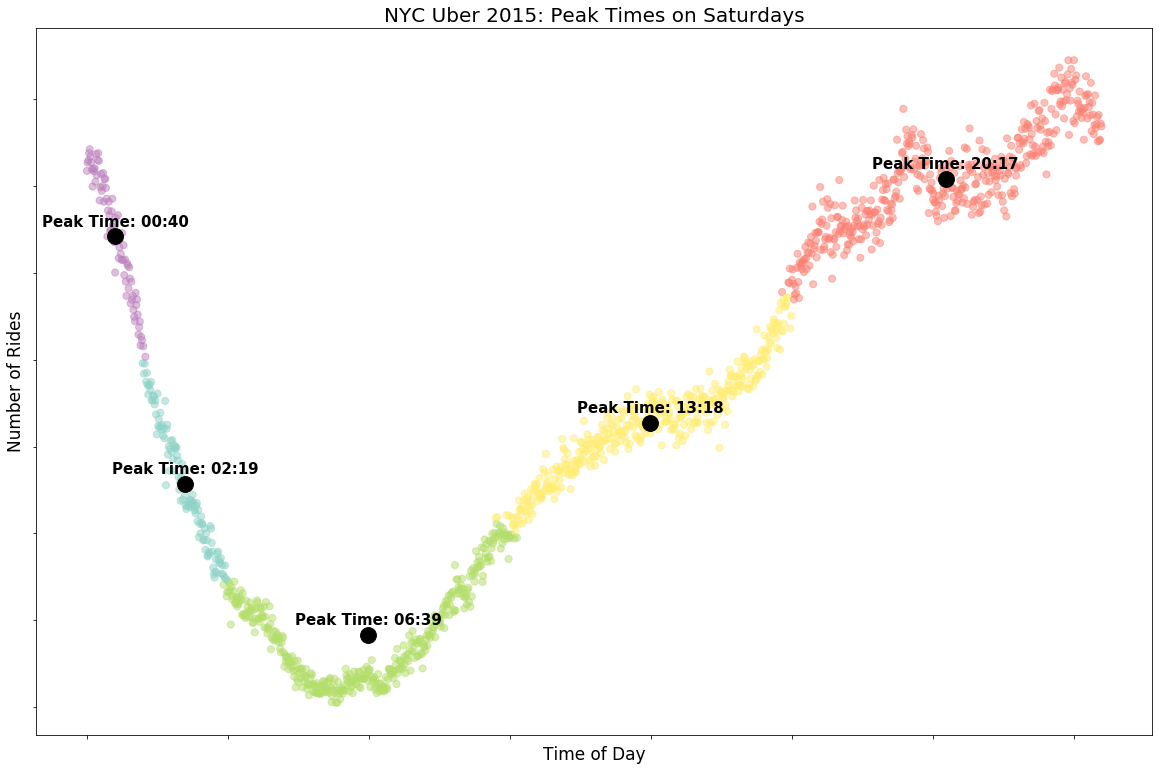

In [47]:
# Plot - Saturdays 2015
ax_Sat15,fig_Sat15 = plt.subplots(figsize=(20,13))

# Plot clusters
plt.scatter( df_Sat_2015['MinuteOfDay'], df_Sat_2015['MinCounts'], c=c_kmeans_Sat15, marker="o", s=50,
            cmap="Set3", alpha=0.5)

# Plot centroids
plt.scatter(kmeans_Sat15.cluster_centers_[:,0], kmeans_Sat15.cluster_centers_[:,1], s=250, c="black")

# Set options for x and y axis labels
fig_Sat15.set_xticklabels([])
fig_Sat15.set_yticklabels([])
plt.xlabel("Time of Day", fontsize=17)
plt.ylabel("Number of Rides", fontsize=17)
plt.title("NYC Uber 2015: Peak Times on Saturdays", fontsize=20)

# Plot centroid labels 
for x,y in zip(kmeans_Sat15.cluster_centers_[:,0], kmeans_Sat15.cluster_centers_[:,1]):
    label="Peak Time: " + (min_to_time(x)) # compute the hour:minute format
    plt.annotate(label, xy=(x,y),textcoords='offset points', xytext=(0,10), ha="center", color="black", 
                 fontsize=15, fontweight="bold")


In [48]:
# Export image file
ax_Sat15.savefig("Uber_Sat2015.png", dpi=300)